# Importing libs

In [37]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Customizing vizualization

In [38]:
sns.set(rc={'figure.figsize' : (9, 6)})

# Loading train/test sets

In [39]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [43]:
train_df.isnull().sum() / len(train_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

1. 19.86% of the entries in the "Age" column are missing. I'll replace them with mean value. 
2. 77.10% of the entries in the "Cabin" column are missing. It may be droped as it doesn't provide reliable information.

In [44]:
test_df.isnull().sum() / len(train_df)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.096521
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.001122
Cabin          0.367003
Embarked       0.000000
dtype: float64

I'll do same for test data

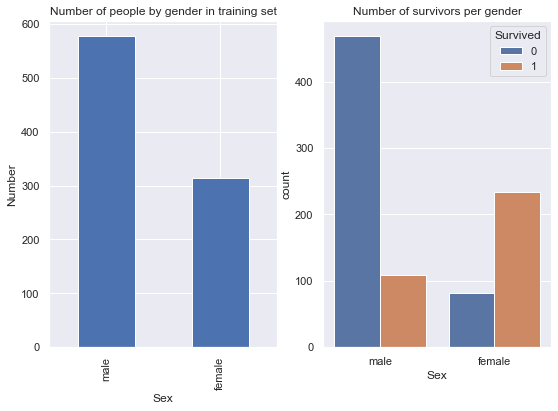

In [45]:
fig, ax = plt.subplots(1, 2)
train_df["Sex"].value_counts().plot(kind='bar',
                                    title= 'Number of people by gender in training set',
                                    xlabel= 'Sex',
                                    ylabel= 'Number',
                                    ax=ax[0])
ax[1].set_title('Number of survivors per gender')
sns.countplot(data=train_df, 
              x='Sex',
              hue='Survived',
              ax=ax[1])
plt.show()

1. There's more males than females in the dataset.
2. Females survived more than males despite having a lower total count.
3. Around 75% of females survived vs. only around 19% of males.

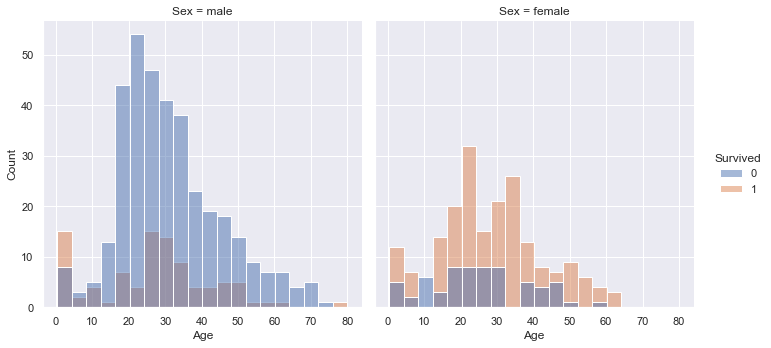

In [46]:
sns.displot(train_df,
           x = 'Age',
           col = 'Sex',
           hue = 'Survived')

It seems that people younger than 10 years have higher chance of survival.

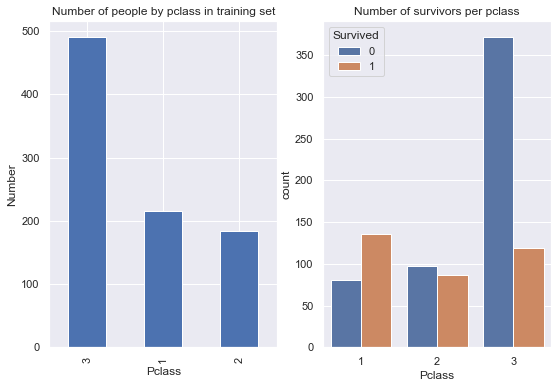

In [47]:
fig, ax = plt.subplots(1, 2)
train_df["Pclass"].value_counts().plot(kind='bar',
                                    title= 'Number of people by pclass in training set',
                                    xlabel= 'Pclass',
                                    ylabel= 'Number',
                                    ax=ax[0])
ax[1].set_title('Number of survivors per pclass')
sns.countplot(data=train_df, 
              x='Pclass',
              hue='Survived',
              ax=ax[1])
plt.show()

1. Most passengers are 3rd class and most of them didn't survive.
2. More then half of 1st class passengers survived. 

<AxesSubplot:title={'center':'Female survivors'}, xlabel='Embarked', ylabel='count'>

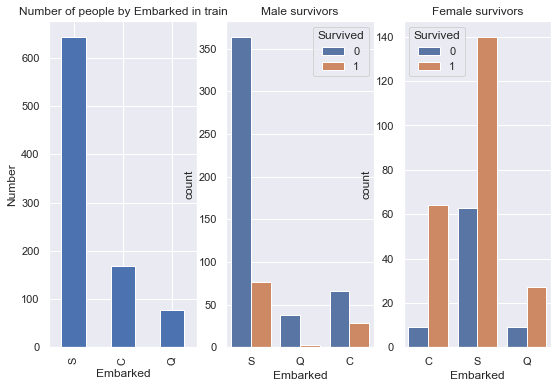

In [48]:
fig, ax = plt.subplots(1, 3)
train_df['Embarked'].value_counts().plot(kind = 'bar',
                                         title= 'Number of people by Embarked in train',
                                         xlabel= 'Embarked',
                                         ylabel= 'Number',
                                         ax=ax[0])
ax[1].set_title('Male survivors')
sns.countplot(data=train_df[train_df['Sex']=='male'],
              x='Embarked',
              hue='Survived',
              ax=ax[1])
ax[2].set_title('Female survivors')
sns.countplot(data=train_df[train_df['Sex']=='female'],
              x='Embarked',
              hue='Survived',
              ax=ax[2])

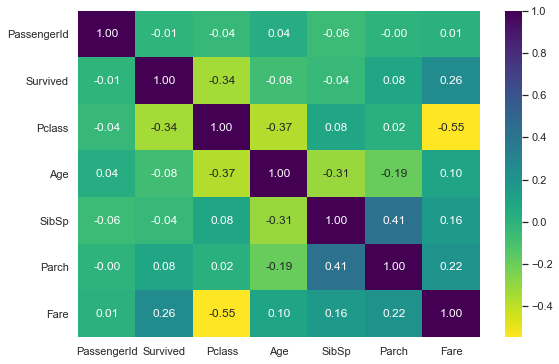

In [49]:
sns.heatmap(train_df.corr(), annot=True, cmap='viridis_r', fmt='.2f');

# Preprocessing

Drop all insignificant columns:

In [50]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Drop all NaN Embarked enteries:

In [51]:
train_df.dropna(subset=["Embarked"], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


Convert categorical variables into dummy/indicator variables

In [52]:
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [53]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Replace NaN values in Age and Fare with mean:

In [54]:
train_df = train_df.fillna({'Age' : train_df.Age.mean()})
test_df = test_df.fillna({'Age' : test_df.Age.mean()})
test_df = test_df.fillna({'Fare' : test_df.Age.mean()})

Create new feature:

In [55]:
for df in [train_df, test_df]:
    df['Relatives'] = df['SibSp'] + df['Parch'] #total number of relatieves
    df.loc[df['Relatives'] > 0, 'travelled_solo'] = 0
    df.loc[df['Relatives'] == 0, 'travelled_solo'] = 1
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Relatives,travelled_solo
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1,0.0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0.0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,1.0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,1,0.0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,1.0


Split training data to test and validation sets:

In [56]:
train_selected_features=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'travelled_solo']
X_train, X_val, y_train, y_val = train_test_split(train_df[train_selected_features],
                                                  train_df["Survived"],
                                                  test_size = 0.3,
                                                  stratify = train_df["Survived"],
                                                  random_state=42)

In [57]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,travelled_solo
748,1,19.000000,1,0,53.1000,0,1,0,0,1,0.0
45,3,29.642093,0,0,8.0500,0,1,0,0,1,1.0
28,3,29.642093,0,0,7.8792,1,0,0,1,0,1.0
633,1,29.642093,0,0,0.0000,0,1,0,0,1,1.0
403,3,28.000000,1,0,15.8500,0,1,0,0,1,0.0


Prepare test set:

In [58]:
test_selected_features=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'travelled_solo']
X_test = test_df[test_selected_features]

In [59]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,travelled_solo
0,3,34.5,0,0,7.8292,0,1,0,1,0,1.0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0.0
2,2,62.0,0,0,9.6875,0,1,0,1,0,1.0
3,3,27.0,0,0,8.6625,0,1,0,0,1,1.0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0.0


# Model Testing

Create RandomForestClassifier:

In [60]:
rf_clf = RandomForestClassifier()

Use grid_search_cv to find best parametrs:

In [61]:
parametrs = {'n_estimators' : list(range(1, 24)), 'max_depth' : list(range(1, 10))}

In [62]:
grid_search_cv_clf = GridSearchCV(rf_clf, parametrs)

In [63]:
grid_search_cv = grid_search_cv_clf.fit(X_train, y_train)

In [64]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

RandomForestClassifier(max_depth=6, n_estimators=12)

In [65]:
best_clf.score(X_val, y_val)

0.7865168539325843

Make predictions using best parametrs:

In [66]:
test_df['Survived'] = best_clf.predict(X_test)
submission = test_df[["PassengerId", "Survived"]]

In [67]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Save submission df to csv:

In [68]:
submission.to_csv("data/submission.csv", index=False)